In [13]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [17]:
ch_7_1 = pd.read_excel('stress_and_CV_experiment_7_Channel_7.1.xlsx', sheet_name='Channel_7_1')

In [5]:
ch_7_2 = pd.read_excel('stress_and_CV_experiment_7_Channel_7.2.xlsx', sheet_name='Channel_7_1')
ch_7_3 = pd.read_excel('stress_and_CV_experiment_7_Channel_7.3.xlsx', sheet_name='Channel_7_1')
ch_7_4 = pd.read_excel('stress_and_CV_experiment_7_Channel_7.4.xlsx', sheet_name='Channel_7_1')

In [22]:
index_7_1 = ch_7_1[ch_7_1['Step_Index'] >= 5].index

In [23]:
dat_7_1 = ch_7_1.drop(index_7_1)
print(dat_7_1)

                     Date_Time  Test_Time(s)  Step_Time(s)  Step_Index  \
0      2018-09-14 16:39:49.863  6.001050e+01       60.0104           1   
1      2018-09-14 16:40:49.864  1.200118e+02      120.0117           1   
2      2018-09-14 16:41:49.853  1.800009e+02      180.0008           1   
3      2018-09-14 16:42:49.861  2.400089e+02      240.0088           1   
4      2018-09-14 16:43:49.860  3.000078e+02      300.0077           1   
...                        ...           ...           ...         ...   
365425 2018-10-16 22:49:04.877  2.750002e+06     1560.0022           4   
365426 2018-10-16 22:50:04.880  2.750062e+06     1620.0046           4   
365427 2018-10-16 22:51:04.876  2.750122e+06     1680.0010           4   
365428 2018-10-16 22:52:04.877  2.750182e+06     1740.0020           4   
365429 2018-10-16 22:53:04.879  2.750242e+06     1800.0037           4   

        Cycle_Index  Voltage(V)  Current(A)  Charge_Capacity(Ah)  \
0                 1    3.530674    1.299788

In [24]:
index_7_1 = ch_7_1[ch_7_1['Step_Index'] >= 5].index
index_7_2 = ch_7_2[ch_7_2['Step_Index'] >= 5].index
index_7_3 = ch_7_3[ch_7_3['Step_Index'] >= 5].index
index_7_4 = ch_7_4[ch_7_4['Step_Index'] >= 5].index

In [25]:
dat_7_1 = ch_7_1.drop(index_7_1)
dat_7_2 = ch_7_2.drop(index_7_2)
dat_7_3 = ch_7_3.drop(index_7_3)
dat_7_4 = ch_7_4.drop(index_7_4)

In [109]:
i = dat_7_1[dat_7_1['Cycle_Index'] > 1].index
cycle_1 = dat_7_1.drop(i)
v_1 = cycle_1['Voltage(V)']
a_1 = cycle_1['Current(A)']
t_1 = cycle_1['Aux_Temperature(℃)_1']
chc_1 = cycle_1['Charge_Capacity(Ah)']
dhc_1 = cycle_1['Discharge_Capacity(Ah)']

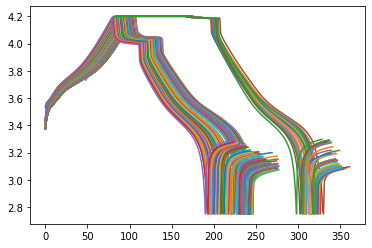

In [110]:
for i in range(0, 215):
    plt.plot(np.array(voltage[i]))

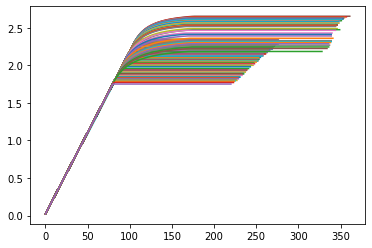

In [108]:
for i in range(0, 215):
    plt.plot(np.array(charge_cap[i]))

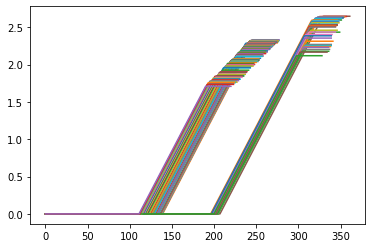

In [107]:
for i in range(0, 215):
    plt.plot(np.array(discharge_cap[i]))

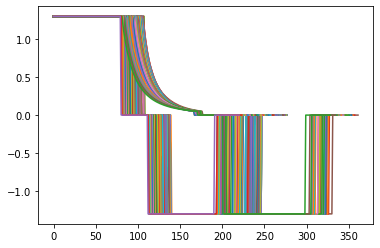

In [112]:
for i in range(0, 215):
    plt.plot(np.array(current[i]))

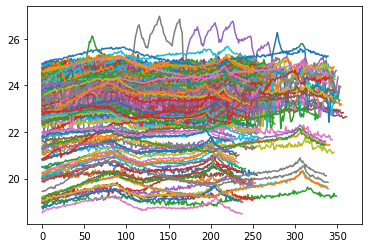

In [111]:
for i in range(0, 215):
    plt.plot(np.array(temp[i]))

In [56]:
df = [dat_7_1, dat_7_2, dat_7_3, dat_7_4]
data = pd.concat(df)
print (data.loc[i, ['Voltage(V)']])
print (max(data['Cycle_Index']))

Voltage(V)    3.38411
Name: 214, dtype: object
215


In [25]:
voltage = []
current = []
temp = []
charge_cap = []
discharge_cap = []
for i in range(1, max(data['Cycle_Index'])+1):
    dat = data[data['Cycle_Index'] == i]
    voltage.append(np.array(dat['Voltage(V)']))
    current.append(dat['Current(A)'])
    temp.append(dat['Aux_Temperature(℃)_1'])
    charge_cap.append(dat['Charge_Capacity(Ah)'])
    discharge_cap.append(dat['Discharge_Capacity(Ah)'])


In [20]:
max_ = 0
k = 0
for i in range(0, 215):
    if max_ < len(voltage[i]):
        max_ = len(voltage[i])
        k = i
    print(i, len(voltage[i]))
print (k, max_)

0 270
1 276
2 277
3 275
4 277
5 276
6 278
7 277
8 277
9 278
10 276
11 277
12 277
13 276
14 278
15 362
16 275
17 277
18 277
19 275
20 275
21 275
22 277
23 358
24 277
25 275
26 276
27 275
28 275
29 277
30 276
31 356
32 275
33 274
34 354
35 274
36 274
37 355
38 277
39 276
40 275
41 276
42 273
43 273
44 275
45 354
46 274
47 353
48 274
49 274
50 354
51 274
52 274
53 273
54 352
55 275
56 273
57 274
58 275
59 352
60 275
61 273
62 273
63 274
64 274
65 273
66 272
67 270
68 272
69 350
70 271
71 271
72 352
73 272
74 270
75 273
76 270
77 350
78 272
79 271
80 272
81 347
82 272
83 270
84 271
85 272
86 349
87 270
88 271
89 349
90 270
91 271
92 270
93 269
94 271
95 269
96 269
97 270
98 269
99 270
100 348
101 269
102 268
103 268
104 269
105 267
106 349
107 269
108 349
109 268
110 267
111 266
112 266
113 267
114 268
115 267
116 267
117 266
118 267
119 347
120 267
121 265
122 265
123 347
124 266
125 347
126 264
127 264
128 345
129 264
130 264
131 345
132 262
133 345
134 264
135 262
136 261
137 345
138 26

In [91]:
data.to_excel("channel_7.xlsx")

In [14]:
data = pd.read_excel("channel_7.xlsx")

In [94]:
print (voltage[173])

       Voltage(V)
13456    3.575430
13456    3.403751
13457    3.582962
13457    3.464970
13458    3.590492
...           ...
13703    3.730652
13703    3.197747
13704    3.550240
13704    3.734557
13704    3.197758

[539 rows x 1 columns]


In [95]:
index = data[data['Cycle_Index'] == 173].index
print(data.loc[index, ['Voltage(V)']])

      Voltage(V)
6975    3.714031
6975    3.402335
6976    3.717791
6976    3.463189
6977    3.721623
...          ...
7220    3.189084
7221    3.803261
7221    3.190055
7222    3.808653
7222    3.190968

[543 rows x 1 columns]


In [11]:
#generate 80:20 train test set
import random
tot = [i for i in range(0, 215)]
train_cycles = random.sample(range(0, 215), (int)(0.8*215))
test_cycles = list(set(tot) - set(train_cycles))

In [12]:
print (test_cycles)
print ((train_cycles))

[128, 134, 26, 27, 29, 157, 162, 35, 36, 37, 163, 172, 173, 174, 48, 56, 185, 58, 189, 62, 191, 65, 195, 201, 204, 77, 205, 208, 81, 210, 214, 91, 93, 94, 95, 112, 114, 115, 117, 119, 120, 124, 126]
[158, 160, 175, 40, 86, 111, 18, 6, 22, 169, 7, 180, 17, 44, 130, 9, 14, 150, 46, 110, 98, 99, 133, 135, 137, 63, 199, 33, 148, 31, 87, 194, 39, 125, 5, 92, 203, 138, 139, 106, 67, 206, 168, 142, 55, 74, 155, 23, 3, 212, 186, 15, 76, 52, 179, 89, 72, 1, 113, 11, 60, 10, 28, 184, 132, 64, 143, 177, 145, 25, 82, 156, 136, 90, 164, 59, 97, 53, 187, 50, 32, 193, 131, 45, 42, 118, 30, 75, 19, 57, 122, 85, 209, 43, 178, 47, 190, 165, 188, 21, 51, 24, 66, 109, 116, 103, 167, 20, 198, 140, 151, 79, 153, 101, 73, 83, 211, 107, 213, 202, 96, 176, 38, 129, 69, 100, 49, 127, 70, 104, 71, 12, 54, 200, 144, 61, 102, 123, 182, 105, 171, 192, 16, 154, 147, 88, 108, 84, 152, 8, 2, 146, 170, 196, 4, 78, 159, 161, 80, 183, 207, 181, 0, 149, 68, 197, 166, 34, 121, 13, 41, 141]


In [16]:
train_df = []
test_df = []
for i in train_cycles:
    train_df.append(data[data['Cycle_Index'] == i])
for i in test_cycles:
    test_df.append(data[data['Cycle_Index'] == i])
train_df = pd.concat(train_df)
test_df = pd.concat(test_df)

In [18]:
train_df.to_excel("train.xlsx")
test_df.to_excel("test.xlsx")